# Introduction to Quantum Computing

## Overview 

***So how can you program a quantum computer?***

Here in this notebook, we introduce some basic quantum computing concepts and how to program a quantum computer using quantum circuits. Here we will focus on running some simple quantum circuits that introduce you to key building blocks. 
 
### Learning Objects 

After using this notebook you should have an understanding of 

* What are *qubits* and why they are different from classical binary bits.
* What is *superposition* and how it could be used to solve a problem.
* What is *interference & entanglement* and how it could be used to solve a problem.
* What are *quantum circuits* and how they relate to solving a problem. 

### Background knowledge

We recommend you have some knowledge of:

* Python programming: language, importing libraries, using functions.
* basic quantum computing concepts: qubits, quantum processes like superposition, interference and entanglement.

These are covered in more detail Lesson 0. Here we will focus on running some simple quantum circuits. 


In [1]:
# here lets import and set some python/jupyter preliminaries
# you don't need to do much here other than run the cell
%matplotlib widget
#%matplotlib ipympl
#%matplotlib inline
#%matplotlib notebook

# generic python libraries
import sys, os

# import some useful wrappers
dir_path = os.path.abspath("")
sys.path.append(dir_path)
from useful_wrappers import *

## Qubits

![1 Bit and Qubits](figs/bitqubitsmall.png "1 Classical Bit compared to Quantum Bit or Qubit")

### Classical vs Quantum Bit

* Classical: digital representation of either 0 *or* 1. Fundamental unit of digital information.
* Quantum: often refered to as qubit, fundamental unit of quantum information, analogous to the classical bit. However, here the quantum state holding the information can exist in a *superposition* of states, meaning they can be 0, 1, or ***both 0 and 1 simultaneously***!

*For more information, see [wikipedia](https://en.wikipedia.org/wiki/Qubit).*

## Quantum Superposition & Measurement
![2 Superposition](figs/superposition.png "2 Superposition of wave-function")

Superposition is where a qubit can be in both 0 and 1 states at the same time (as shown in the figure above). This mixed state is **NOT** directly measured. Instead measurement of a qubit will return a $\ket{0}$ **or** $\ket{1}$, *not both*.

*How do you know the qubit was in a mixed state before the measurement occurs?* **By repeating the experiment and measurment.** You will see that the qubit will be 0 or 1 with the probability being dependent on the mixed state.

*For more information, see [wikipedia](https://en.wikipedia.org/wiki/Quantum_superposition).*

## Quantum Interference & Entanglement 

![3 Superposition](figs/entanglement.png "3 Two Qubit entangled wave-function")

Quantum entanglement is the a unique feature of quantum mechanics (the physics that governs the small-scale universe) that not present in classical mechanics that well describes our day-to-day world (cars, planes, footballs). The phenomenon is when quantum states are interacting in such a way that the quantum state of each particle of the group cannot be described independently of the state of the others, even when particles are separated by a large distance ("spooky-action-at-a-distance"). 

You can view **entangled** *qubits* behaving as linked coins: example would be that if you measure a $\ket{0}$ for qubit 1, you measure a $\ket{0}$ for qubit 2 and $\ket{q_1}=\ket{1}$ would mean $\ket{q_2}=\ket{1}$. In this case we cannot get the mixed states $\ket{01}$ and $\ket{10}$.

*For more information, see [wikipedia](https://en.wikipedia.org/wiki/Quantum_entanglement).*

## Quantum Circuits

Quantum programs (or algorithms) are often visualised as a *quantum circuit* as shown below. 

![3 Qubit Circuit](figs/simple_circuit_annotated_small.png "3 Qubit circuit")

This shows the evolution of qubits as a single line going from left to right. If you ever see a doubled lines that represent a classical bit. Quantum gates are shows as symbols on the line and the entire program is this sequence of operations on qubits.  These lines define the sequence of events, and are usually not physical cables. 

This is a nice way fo visualising a quantum program as it can show what happens to a given qubit and also which qubits are interacting (as shown by vertical lines with symbols ending on the qubit lines). 

## Simulating Quantum Computers and running Quantum Circuits

There are a variety of tools out there which can simulate a quantum computer (albeit slowly and only for small qubit counts). In this notebook, we'll make use of a few of them, namely [**PennyLane**](https://pennylane.ai/) and [**Qiskit**](https://www.ibm.com/quantum/qiskit). We'll also use some nice tools like [**qmuvi**](https://github.com/garymooney/qmuvi) a visualisation tool and [**matplotlib**](https://matplotlib.org/)

## Superposition or Hadamard Gate

One of the simplest instructions or operations you can apply to a qubit is the *Hadamard* gate, $H$, which essentially implements **superposition**, turning a state of $\ket{0}$ or $\ket{1}$ into an equal superposition of $\ket{0}$ and $\ket{1}$. Think of this like a coin spinning where, when you catch it, you might get heads or tails. 

More precisely 
$$H\ket{0} = \frac{\ket{0}+\ket{1}}{\sqrt{2}}, \quad H\ket{1} = \frac{\ket{0}-\ket{1}}{\sqrt{2}}$$

In both cases, one changes the qubit from just return it's initial state when being measured to giving either 0 or 1 with $50\%$ probability. 

***Why the difference between $H\ket{0}$ and $H\ket{1}$?*** The `+` and `-` between the two states is a subtle difference dealing with *phase* but both when measured would give 0 or 1 with $50\%$ probability. 

Let's consider a quantum circuit consisting of a single qubit starting in $\ket{0}$ and applying a Hadarmard gate. 

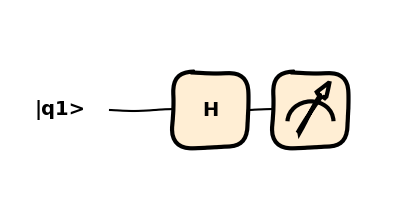

In [16]:
# sample code to draw a hadarmad gate using PennyLane
# here 
dev = qml.device("default.qubit", wires=["|q1>"])

# now simple circiut where we return the state of the qubits
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires="|q1>")
    return qml.counts(all_outcomes=True)

# plot the circuit
fig, ax = qml.draw_mpl(circuit)()
fig

What could we expect if we measured the output of this circuit 10 times? 100 times? What happens if you do 1000 times?

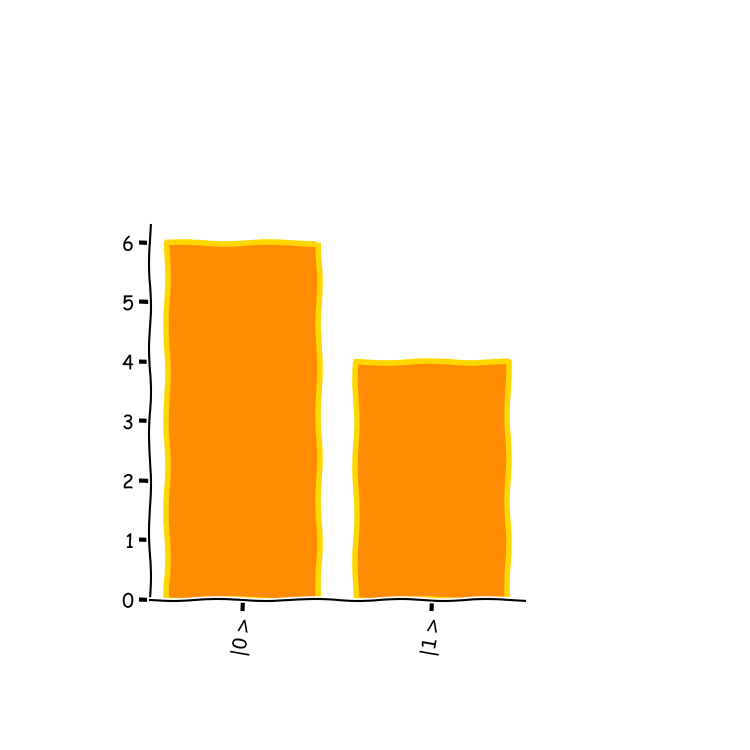

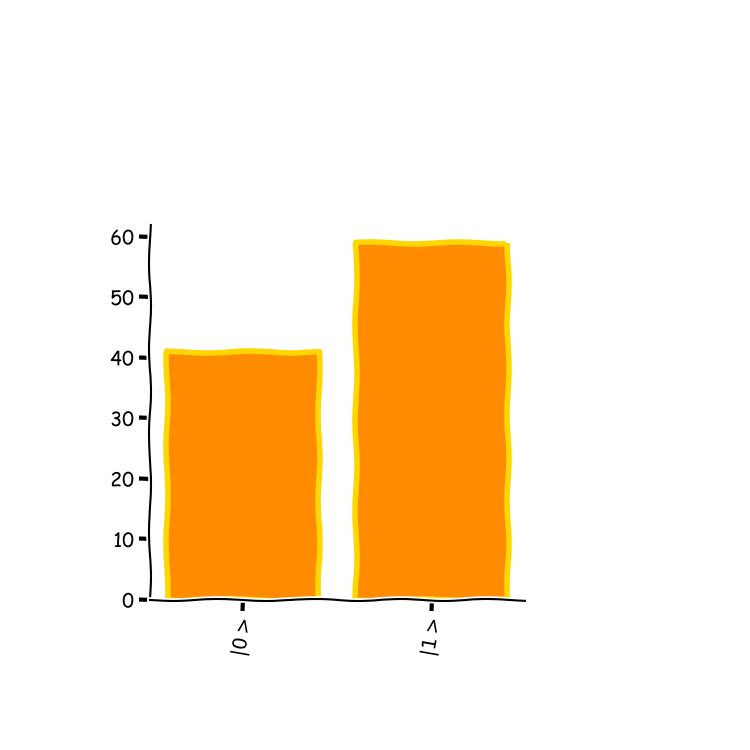

In [3]:
# lets create a quantum device that will take 10 shots
results = circuit(shots=10)
# here plot the results
PlotPennyLaneHisto(results, '10 measurements (or 10 coin flips)')

# now you try running more shots by running the circuit again. 
results = circuit(shots=100)
# here plot the results
PlotPennyLaneHisto(results, '100 measurements')

# what would you expect if you could infinitly sample the simple circuit?

### What's the "sound" of a mixed state?

To gain more understainding, let's look at using the **qmuvi** visualisation tool to see what is happening with the Hadamard gate. In a classical system, you can only have 0 or 1 but in the quantum system, while the state is not measured, it is a real mixture of 0 and 1. Let's consider a musical analogue. If we considered 0 to be a note and 1 being another then we should expect the music to start with a single note before the Hadamard gate is placed, then it should become two notes and when measured go back to one of the notes. 

Here we'll have to use Qiskit to create the circuit 

In [4]:
# if this works 
run_qmuvi = False 
if run_qmuvi: 
    circuit = QuantumCircuit(1)
    # Barrier gates tell qMuVi where to sample the state in the circuit. It's like you are measuring the system with out truly collapsing the state
    circuit.barrier()
    circuit.h(0)
    circuit.barrier()
    # how to measure with qiskit that works with qmuvi?
    #circuit.
    
    qmuvi.generate_qmuvi(circuit, "hadamard")


### Playing with Hadamard's 

#### Interactive widget
We can make use of an interactive tool to create and run some plots. Lets try just visualising some circuits. Then we'll try running a simulation of a quantum circuit. Try running more than one qubit or more than one gate per qubit. What do you see?

#### Custom
If you really interested, look at the boiler plate code in the section below and try playing with it. 


In [5]:
# here's an interactive widget 
hqubits = []
interact(MakeCircuit, num_qubits=widgets.IntSlider(min=1, max=100, step=1, value=2), 
         add_H=True, 
         add_CNOT = fixed(False), 
         hqubits=fixed('all'),
         cnotqubits = fixed('default')
        )

interactive(children=(IntSlider(value=2, description='num_qubits', min=1), Checkbox(value=True, description='a…

<function useful_wrappers.MakeCircuit(num_qubits: int = 1, add_H: bool = True, add_CNOT: bool = True, hqubits: str = 'all', cnotqubits: str = 'default', report_system_requirements: bool = False)>

You can even try simulating the output of a quantum computer

In [6]:
interact(MakeAndRunCircuit, 
         num_measurements=widgets.IntSlider(min=10, max=10000, step=5, value=10), 
         num_qubits=widgets.IntSlider(min=1, max=10, step=1, value=2), 
         add_H=True, 
         add_CNOT = fixed(False), 
         hqubits=fixed('all'),
         cnotqubits=fixed('default')
        )

interactive(children=(IntSlider(value=10, description='num_measurements', max=10000, min=10, step=5), IntSlide…

<function useful_wrappers.MakeAndRunCircuit(num_measurements: int = 100, num_qubits: int = 1, add_H: bool = True, add_CNOT: bool = True, hqubits: str = 'all', cnotqubits: str = 'default', report_system_requirements: bool = False)>

In [7]:
# Here is the boiler plate
# you can list the qubits and pass wires

run_template = False
if (run_template): 
    # initialise a device with lets say some number of qubits (which you can directly pass to wires)
    num_qubits = 0
    dev = qml.device("default.qubit", wires=num_qubits)
    @qml.qnode(dev)
    def circuit():
        # add your circuits here
        # for example to add a hadamard gate to the first qubit 
        # qml.Hadamard(wires=0)
        # what happens if you apply two hadamard gates to a single qubit?
        
        return qml.counts(all_outcomes=True)
    
    # lets look at the circuit
    fig, ax = qml.draw_mpl(circuit)()
    
    # then run the circuit and plot the result. How many shots do you think you need to take to really get the ideal (true) result?
    num_measurements = 0
    results = circuit(shots=num_measurements)
    PlotPennyLaneHisto(results, f' {num_shots} measurements')


## Entanglement or "CNOT" Gate

Another of the simplest instructions or operations you can apply to two qubits is the *Controlled NOT (CNOT)* gate, $CNOT(\textrm{qubit}_{1}, \textrm{qubit}_{2})$ which essentially implements entanglement. It entangles two qubits so that the state of the second qubit is dependent on the state of the first. The CNOT gate flips the second qubit (the target qubit) if and only if the first qubit (the control qubit) is $\ket{1}$. So if we look at table of what happens before and after entanglement we see 

| Before       |              | | After        |              |
| ------------ | ------------ | - | ------------ | ------------ |
| Control $\ket{q_1}$ | Target $\ket{q_2}$  | $\rightarrow$ | Control $\ket{q_1}$  | Target $\ket{q_2}$  |
| $\ket{0}$    | $\ket{0}$    | $\rightarrow$ | $\ket{0}$    | $\ket{0}$    |
| $\ket{1}$    | $\ket{0}$    | $\rightarrow$ |  $\ket{1}$    | $\ket{1}$    |
| $\ket{0}$    | $\ket{1}$    | $\rightarrow$ |  $\ket{0}$    | $\ket{1}$    |
| $\ket{1}$    | $\ket{1}$    | $\rightarrow$ |  $\ket{1}$    | $\ket{0}$    |


You can view this as an a classical computers *if* statement, where you change something based on a condition, though here it is important to remember that you don't know what the outcome is till you measure the qubits. These entangled two-qubit states are sometimes referred to as *Bell* states. 

In [8]:
# sample code to draw a CNOT gate using PennyLane
# here 
dev = qml.device("default.qubit", wires=["|q1>", "|q2>"])

# now simple circiut where we return the state of the qubits
@qml.qnode(dev)
def circuit():
    # CNOT takes a list of two qubits with the first being the control and the second being the qubit being entangled.  
    qml.CNOT(["|q1>","|q2>"])
    return qml.counts(all_outcomes=True)

# plot the circuit
fig, ax = qml.draw_mpl(circuit, show_all_wires=True)()

Now this CNOT gate is not exceptionally useful on its own but combined with superposition, it can be very useful. Let's consider the following circuits where the first qubit is in superposition:

In [9]:
# sample code to draw a CNOT gate using PennyLane
dev = qml.device("default.qubit", wires=["|q1>", "|q2>"])

# now simple circiut where we return the state of the qubits
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires="|q1>")
    qml.CNOT(["|q1>","|q2>"])
    return qml.counts(all_outcomes=True)

@qml.qnode(dev)
def circuitnoCNOT():
    qml.Hadamard(wires="|q1>")
    return qml.counts(all_outcomes=True)

# plot the circuit
fig, ax = qml.draw_mpl(circuitnoCNOT, show_all_wires=True)()
fig, ax = qml.draw_mpl(circuit, show_all_wires=True)()


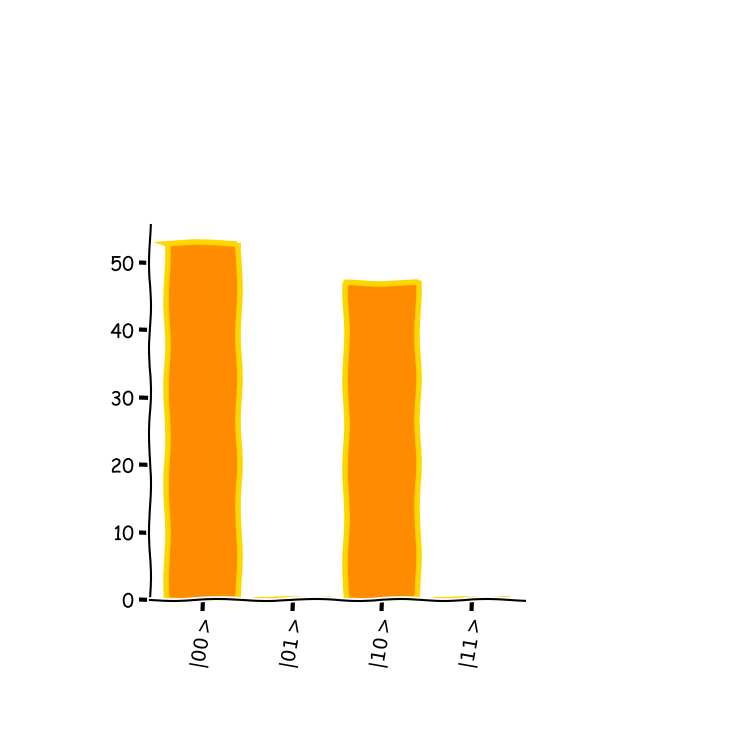

In [10]:
# lets create the quantum device and run the noCNOT circuit
dev = qml.device("default.qubit", wires=["|q1>", "|q2>"])

@qml.qnode(dev)
def circuitnoCNOT():
    qml.Hadamard(wires="|q1>")
    return qml.counts(all_outcomes=True)
results = circuitnoCNOT(shots=100)
# here plot the results
PlotPennyLaneHisto(results, '100 shots, no CNOT')

Here, we see that we get either $\ket{00}$ or $\ket{10}$ with equal probability. What do you expect to see if you have a CNOT? (discuss then try uncommenting the results)

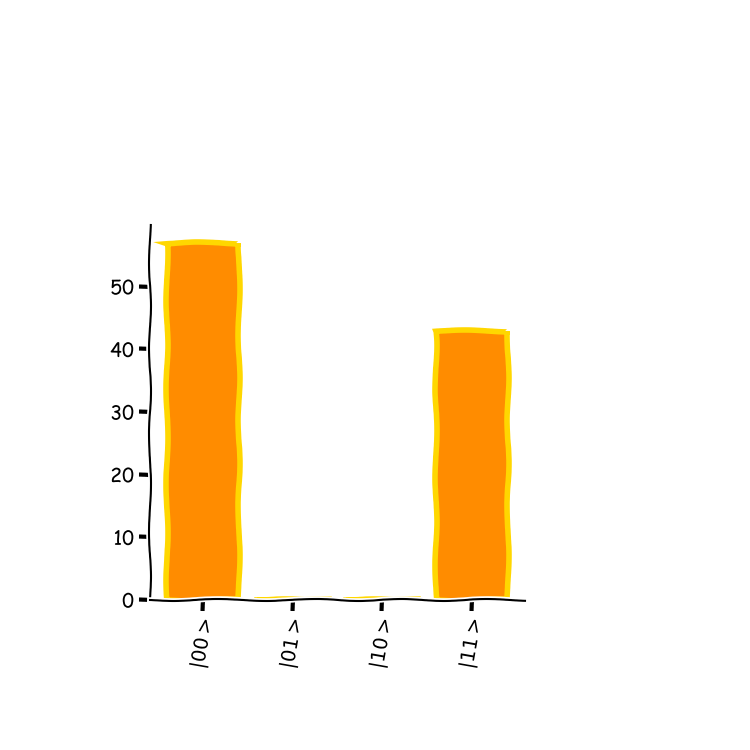

In [11]:
# now do the same with CNOT
dev = qml.device("default.qubit", wires=["|q1>", "|q2>"])

# now simple circiut where we return the state of the qubits
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires="|q1>")
    qml.CNOT(["|q1>","|q2>"])
    return qml.counts(all_outcomes=True)

results = circuit(shots=100)
# here plot the results
PlotPennyLaneHisto(results, '100 shots, apply CNOT')

### Playing with CNOT's 

Let the Hadarmard gates, let's try a simple interactive setup. 

If you are really interested, you can try playing with the boiler plate code as well. 
Try playing with this gate with the boiler plate code below. Try running more than two qubits and entangling lot of them. What do you see

In [12]:
# note here that I've added a hadamard to the first qubit
# consider trying to play with this
hadamard_set = [0]
interact(MakeAndRunCircuit, 
         num_measurements=widgets.IntSlider(min=10, max=10000, step=5, value=10), 
         num_qubits=widgets.IntSlider(min=1, max=10, step=1, value=2), 
         add_H = True, 
         add_CNOT = True, 
         hqubits=fixed(hadamard_set),
         cnotqubits=fixed('default'))

interactive(children=(IntSlider(value=10, description='num_measurements', max=10000, min=10, step=5), IntSlide…

<function useful_wrappers.MakeAndRunCircuit(num_measurements: int = 100, num_qubits: int = 1, add_H: bool = True, add_CNOT: bool = True, hqubits: str = 'all', cnotqubits: str = 'default', report_system_requirements: bool = False)>

In [13]:
# now boiler plate code for CNOT
dev = qml.device("default.qubit", wires=["|q1>", "|q2>", "|q3>",])

# now simple circiut where we return the state of the qubits
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires="|q1>")
    qml.CNOT(["|q1>","|q2>"])
    return qml.counts(all_outcomes=True)
# what does your circuit look like 
# fig, ax = qml.draw_mpl(circuit, show_all_wires=True)()

# lets create a quantum device that will take 100 shots
results = circuit(shots=100)
# here plot the results
# PlotPennyLaneHisto(results, 'Your experiment')

## Simulating a quantum computer

You have been simulating a quantum computer here but the number of qubits is quite small. We can explore how much classical computing memory you would need to run and how long it would run. Let's have a look

In [14]:
interact(PlotSystemRequirements, 
         num_qubits = widgets.IntSlider(min=1, max=128, step=1, value=3), 
         num_gates = widgets.IntSlider(min=1, max=10000, step=1, value=1),
         num_measurements = widgets.IntSlider(min=1, max=10000, step=1, value=1),
        )

interactive(children=(IntSlider(value=3, description='num_qubits', max=128, min=1), IntSlider(value=1, descrip…

<function useful_wrappers.PlotSystemRequirements(num_qubits: int = 2, num_gates: int = 1, num_measurements: int = 1)>

## References

* Some reference